In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
activity_file_path = "/content/drive/MyDrive/Python/activity.csv"
users_file_path = "/content/drive/MyDrive/Python/users.csv"

In [3]:
df_activity = pd.read_csv(activity_file_path, index_col=0)
df_users = pd.read_csv(users_file_path, index_col=0)

In [4]:
merged_df = pd.merge(df_activity, df_users, on='UserId', how='inner')

In [5]:
#Want to get a better view of the newly merged dataset
print(merged_df.head(15))

     UserId        Date  Revenue Country         DOB Gender     RegDate
0   1326865  2017-02-19    17.05      DE  1988-05-04      M  2016-03-24
1   1326865  2017-02-28    17.05      DE  1988-05-04      M  2016-03-24
2   1326865  2017-03-06    17.16      DE  1988-05-04      M  2016-03-24
3   1326865  2017-03-07    17.16      DE  1988-05-04      M  2016-03-24
4   1326865  2017-03-08    17.16      DE  1988-05-04      M  2016-03-24
5   1326865  2017-03-21    17.16      DE  1988-05-04      M  2016-03-24
6   1326865  2017-03-29    17.16      DE  1988-05-04      M  2016-03-24
7   1326865  2017-03-30    21.45      DE  1988-05-04      M  2016-03-24
8   1326865  2017-04-04    17.09      DE  1988-05-04      M  2016-03-24
9   1326865  2017-04-05    17.09      DE  1988-05-04      M  2016-03-24
10  1326865  2017-04-19    17.09      DE  1988-05-04      M  2016-03-24
11  1326865  2017-04-23    34.17      DE  1988-05-04      M  2016-03-24
12  1326865  2017-05-02    21.36      DE  1988-05-04      M  201

In [6]:
#Want to check for shape of dataset
print(merged_df.shape)

(22642, 7)


In [7]:
#Want to get a standard view of other useful info in the dataset
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22642 entries, 0 to 22641
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UserId   22642 non-null  int64  
 1   Date     22642 non-null  object 
 2   Revenue  22642 non-null  float64
 3   Country  22642 non-null  object 
 4   DOB      22642 non-null  object 
 5   Gender   22642 non-null  object 
 6   RegDate  22642 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB
None


In [8]:
#Check for missing values in the dataeset
print(merged_df.isnull().sum())

UserId     0
Date       0
Revenue    0
Country    0
DOB        0
Gender     0
RegDate    0
dtype: int64


In [9]:
#Want to convert date related columns to appropiate data types
merged_df['Date']=pd.to_datetime(merged_df['Date'],errors='coerce')
merged_df['DOB']=pd.to_datetime(merged_df['DOB'],errors='coerce')
merged_df['RegDate']=pd.to_datetime(merged_df['RegDate'],errors='coerce')

In [10]:
#Verify changes
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22642 entries, 0 to 22641
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   UserId   22642 non-null  int64         
 1   Date     22642 non-null  datetime64[ns]
 2   Revenue  22642 non-null  float64       
 3   Country  22642 non-null  object        
 4   DOB      22642 non-null  datetime64[ns]
 5   Gender   22642 non-null  object        
 6   RegDate  22642 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(2)
memory usage: 1.2+ MB
None


In [11]:
print(merged_df.head(15))

     UserId       Date  Revenue Country        DOB Gender    RegDate
0   1326865 2017-02-19    17.05      DE 1988-05-04      M 2016-03-24
1   1326865 2017-02-28    17.05      DE 1988-05-04      M 2016-03-24
2   1326865 2017-03-06    17.16      DE 1988-05-04      M 2016-03-24
3   1326865 2017-03-07    17.16      DE 1988-05-04      M 2016-03-24
4   1326865 2017-03-08    17.16      DE 1988-05-04      M 2016-03-24
5   1326865 2017-03-21    17.16      DE 1988-05-04      M 2016-03-24
6   1326865 2017-03-29    17.16      DE 1988-05-04      M 2016-03-24
7   1326865 2017-03-30    21.45      DE 1988-05-04      M 2016-03-24
8   1326865 2017-04-04    17.09      DE 1988-05-04      M 2016-03-24
9   1326865 2017-04-05    17.09      DE 1988-05-04      M 2016-03-24
10  1326865 2017-04-19    17.09      DE 1988-05-04      M 2016-03-24
11  1326865 2017-04-23    34.17      DE 1988-05-04      M 2016-03-24
12  1326865 2017-05-02    21.36      DE 1988-05-04      M 2016-03-24
13  1326865 2017-05-04    17.01   

In [12]:
### Question 1

##### How many female users are in the dataset?
#For all users with missing gender information...
#...please set the gender field to the most common gender in the dataset.
#We'll do a gender analysis to look at this more closely
gender_analysis = merged_df.groupby('Gender'). agg({'UserId' : ['nunique', 'count'],
                                                    'Revenue': ['sum', 'mean', 'median']}).reset_index()
gender_analysis.columns = ['Gender','Distinct_Users','Total_Entries','Total_Revenue','Avg_Revenue','Median_Revenue']

In [13]:
print(gender_analysis)

  Gender  Distinct_Users  Total_Entries  Total_Revenue  Avg_Revenue  \
0                   1481           5585      643047.26   115.138274   
1      F            1412           6918      709044.93   102.492762   
2      M            2904          10139     1619975.30   159.776635   

   Median_Revenue  
0           35.00  
1           39.46  
2           44.54  


In [14]:
#Given that there are no missing values per the earlier null check...
#...the value indexed at 0 in 'Gender' is in all likelihood whitespace
print(merged_df.Gender.unique())

['M' 'F' ' ']


In [15]:
#Strip whitespace from Gender column
merged_df['Gender'] = merged_df['Gender'].str.strip()

In [16]:
merged_df['Gender'] = merged_df['Gender'].replace([""," "], "M")

In [17]:
#Recompute the gender_analysis columns so they update to reflect the changes

gender_analysis = merged_df.groupby('Gender').agg({'UserId': ['nunique', 'count'],
                                                   'Revenue': ['sum', 'mean','median']}).reset_index()

gender_analysis.columns = ['Gender','Distinct_Users','Total_Entries','Total_Revenue','Avg_Revenue','Median_Revenue']

In [18]:
print(gender_analysis)

  Gender  Distinct_Users  Total_Entries  Total_Revenue  Avg_Revenue  \
0      F            1412           6918      709044.93   102.492762   
1      M            4385          15724     2263022.56   143.921557   

   Median_Revenue  
0           39.46  
1           40.87  


In [19]:
print(merged_df['Gender'].unique())

['M' 'F']


In [20]:
#### Question 2

##### What is the mean revenue generated per user (ie across all dates)?

### Question 3

##### Compare the mean and the median revenue generated per user.
revenue_per_user = merged_df.groupby('UserId')['Revenue'].sum()
mean_revenue_per_user = revenue_per_user.mean().round(2)
median_revenue_per_user = revenue_per_user.median()
print(mean_revenue_per_user)
print(median_revenue_per_user)

512.69
80.0


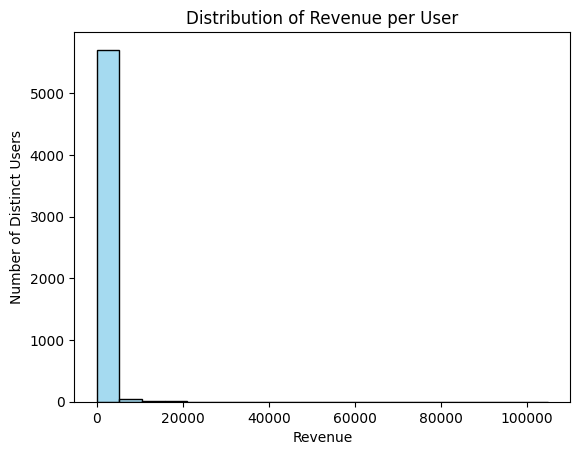

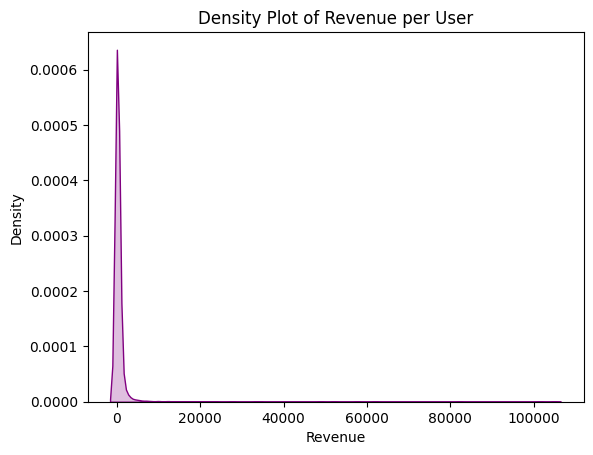

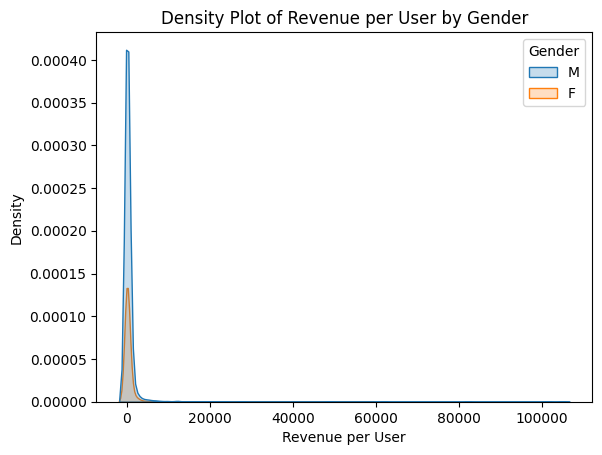

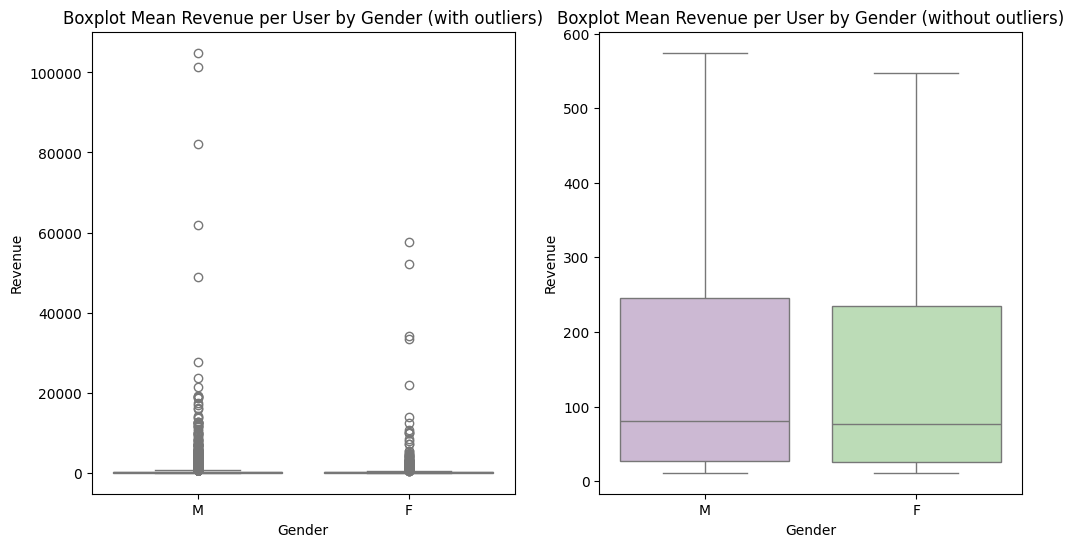

In [31]:
### Question 4

##### Please visualise the distribution of the revenues per user.

# Can generate a Histogram to show this
sns.histplot(revenue_per_user, kde=False, bins=20, color="skyblue")
plt.title("Distribution of Revenue per User")
plt.xlabel("Revenue")
plt.ylabel("Number of Distinct Users")
plt.show()

# This doesn't present the distribution the best, even when changing the number of bins. Going to consider a Density Plot
sns.kdeplot(revenue_per_user, fill=True, color="purple")
plt.title("Density Plot of Revenue per User")
plt.xlabel("Revenue")
plt.show()

# Calculate mean revenue per user by gender
mean_revenue_per_user_by_gender = merged_df.groupby(['UserId', 'Gender'])['Revenue'].sum().reset_index()

# Density plot by Gender
sns.kdeplot(data=mean_revenue_per_user_by_gender, x='Revenue', hue='Gender', fill=True)
plt.title("Density Plot of Revenue per User by Gender")
plt.xlabel("Revenue per User")
plt.ylabel("Density")
plt.show()


# Boxplot
# Set figure size
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Boxplot with outliers
sns.boxplot(ax=ax1, x="Gender", y="Revenue", data=mean_revenue_per_user_by_gender, hue='Gender', palette="PRGn", showfliers=True)
#sns.swarmplot(x="Gender", y="Revenue", data=mean_revenue_per_user_by_gender, color='black', alpha=0.5)
ax1.set_title("Boxplot Mean Revenue per User by Gender (with outliers)")

# Boxplot without outliers
sns.boxplot(ax=ax2, x="Gender", y="Revenue", data=mean_revenue_per_user_by_gender, hue='Gender', palette="PRGn", showfliers=False)
ax2.set_title("Boxplot Mean Revenue per User by Gender (without outliers)")

#Can now visualise the above plots to get a fairer view of the impact of outliers on our dataset
plt.show()

In [24]:
### Question 5

##### What is the average revenue generated per user in the first week?
first_week_rev = (merged_df.loc[merged_df['Date'] <= merged_df['RegDate'] + pd.Timedelta(days=7)].groupby('UserId')['Revenue'].sum())
average_first_week_rev = first_week_rev.mean().round(2)
print("The average revenue generated per user in the first week was " + str(average_first_week_rev))




The average revenue generated per user in the first week was 200.25


In [26]:
### Question 6

##### In this dataset men generated a higher revenue than women, on average. In which country is this difference biggest?

# Need to calculate difference between men and women for revenue generation in country. Requires similar approach but grouping of Country in addition to UserId
country_gender_revenue = merged_df.groupby(['Country', 'Gender'])['Revenue'].mean().unstack()

# Can substract F from larger M entried to get a view on mean difference to see where the difference is most pronounced
country_gender_revenue['Difference'] = country_gender_revenue['M'] - country_gender_revenue['F']

largest_difference_country = country_gender_revenue['Difference'].idxmax()
largest_difference_value = country_gender_revenue['Difference'].max()

#Using f string here as this is a bit cleaner than +str and just seems a better all round habit to develop
print(f"The country with the largest difference in average revenue between men and women is {largest_difference_country} with a difference of {largest_difference_value:.2f}.")


The country with the largest difference in average revenue between men and women is US with a difference of 121.24.


In [27]:
#Can print before visualising it to get a better view of which countries see the biggest differences in mean gender spending
country_gender_revenue_sorted = country_gender_revenue.sort_values(by='Difference')
print(country_gender_revenue_sorted)

Gender            F           M  Difference
Country                                    
Other    100.714426   88.828795  -11.885631
FR       150.353720  152.940218    2.586498
GB       117.659814  149.457295   31.797481
DE        60.253421  103.875801   43.622380
US        71.586192  192.821748  121.235556


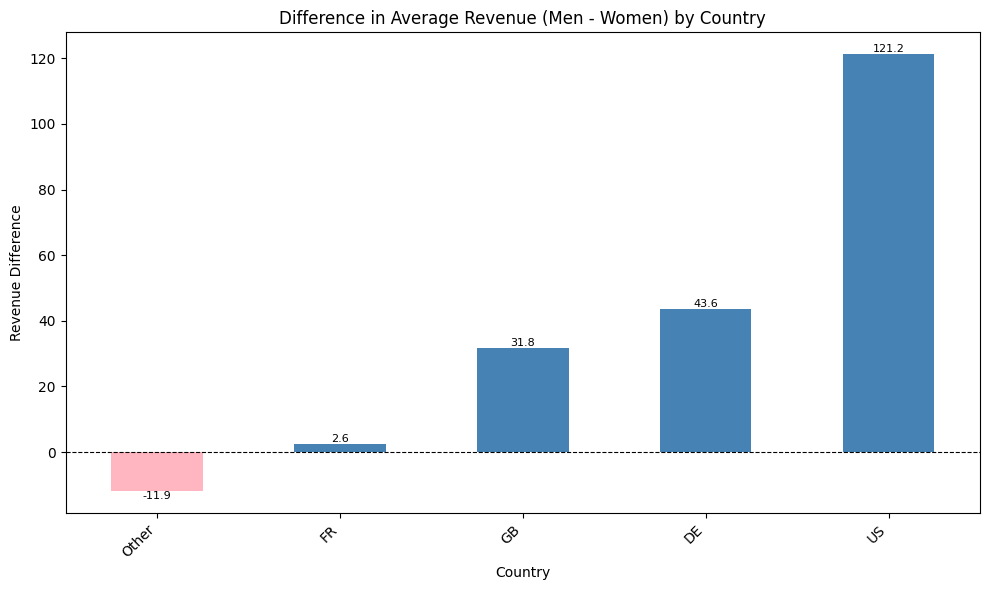

In [29]:
colors = country_gender_revenue_sorted['Difference'].apply(lambda x: 'steelblue' if x > 0 else 'lightpink')

#plotting the barchart
plt.figure(figsize=(12, 6))
country_gender_revenue_sorted['Difference'].plot(kind='bar', color=colors)
plt.title("Difference in Average Revenue (M/F) by Country")
plt.xlabel("Country")
plt.ylabel("Revenue Difference")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # line added y=0 purely for aesthetic
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding labels to the bars
for index, value in enumerate(country_gender_revenue_sorted['Difference']):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom' if value > 0 else 'top', fontsize=8)



Useful link for finding the type of colours in you like in Matplotlib - https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

<Figure size 1200x600 with 0 Axes>

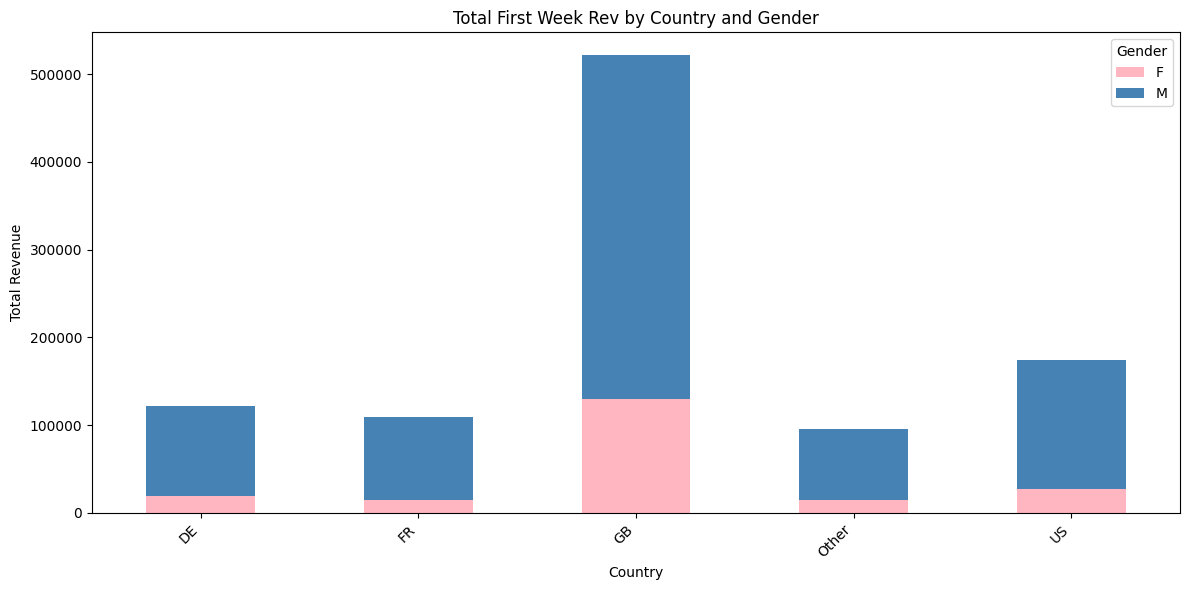

In [30]:
### Question 7

##### Please visualise the relationship between country, gender and revenue in the first week with an appropriate chart.

# Filtering for the first week of revenue
def filter_first_week(df):
    first_week_df = df.loc[df['Date'] <= df['RegDate'] + pd.Timedelta(days=7)]
    return first_week_df

first_week_df = filter_first_week(merged_df)

# Using similar aggregation to focus on rev in the first week and pivoting
country_gender_revenue_first_week = first_week_df.groupby(['Country', 'Gender'])['Revenue'].sum().reset_index()
pivot_first_week = country_gender_revenue_first_week.pivot(index='Country', columns='Gender', values='Revenue').fillna(0)

# Create the bar chart
plt.figure(figsize=(12, 6))
pivot_first_week.plot(kind='bar', stacked=True, figsize=(12, 6), color={'M': 'steelblue', 'F': 'lightpink'})

# Chart formatting
plt.title("Total First Week Rev by Country and Gender")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.tight_layout()
plt.show()